<a href="https://colab.research.google.com/github/newtonotwen/newt/blob/main/bike_sharing_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

def clean_text(df, cols):
  for col in cols:
    df[col]= df[col].str.strip()
    return df

def datatype (df):
  categorical_list=[]
  numerical_list=[]
  for col in df.columns.tolist():
    if df[col].dtype == 'object':
      categorical_list.append(col)
    else:
      numerical_list.append(col)
      print("categorical_list", categorical_list)
      print("numerical_list", numerical_list)
      return categorical_list, numerical_list
      
def check_unique(df, cols):
  entity =[]
  for col in cols:
    unique_values = df[col].unique().tolist()
    entity.append(unique_values)
    mydict = dict(zip(cols,entity))
    result = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in mydict.items() ]))
    result = result.replace(np.nan, '', regex=True)
    display(result)


In [ ]:
df= pd.read_csv('./bike_sharing_demand.csv')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
df.describe()

In [ ]:
df.describe(include= object)

,datetime
count,10886
unique,10886
top,12/3/2011 20:00
freq,1


In [ ]:
data_mean= df[['season', 'humidity', 'windspeed', 'temp']].groupby('season').agg(['mean'])
data_mean

,humidity,windspeed,temp
,mean,mean,mean
season,,,
1,56.297841,14.636978,12.530491
2,60.852909,13.405607,22.823483
3,64.123674,11.508862,28.789111
4,66.173738,11.678147,16.649239


In [ ]:
datatype(df)

categorical_list ['datetime']
numerical_list ['season']


(['datetime'], ['season'])

In [ ]:
cols= df[['datetime', 'windspeed', 'temp', 'humidity', 'season']]
clean_text(df, cols)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,12/19/2012 19:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,12/19/2012 20:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,12/19/2012 21:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,12/19/2012 22:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
new_df= df[['datetime', 'windspeed', 'temp', 'humidity', 'season', 'atemp', 'registered', 'count']]
new_df.head()

,datetime,windspeed,temp,humidity,season,atemp,registered,count
0,1/1/2011 0:00,0.0,9.84,81,1,14.395,13,16
1,1/1/2011 1:00,0.0,9.02,80,1,13.635,32,40
2,1/1/2011 2:00,0.0,9.02,80,1,13.635,27,32
3,1/1/2011 3:00,0.0,9.84,75,1,14.395,10,13
4,1/1/2011 4:00,0.0,9.84,75,1,14.395,1,1


In [ ]:
check_unique(df, df[['season', 'atemp']])

In [ ]:
df.dropna().head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
new_df.dropna().head()

,datetime,windspeed,temp,humidity,season,atemp
0,1/1/2011 0:00,0.0,9.84,81,1,14.395
1,1/1/2011 1:00,0.0,9.02,80,1,13.635
2,1/1/2011 2:00,0.0,9.02,80,1,13.635
3,1/1/2011 3:00,0.0,9.84,75,1,14.395
4,1/1/2011 4:00,0.0,9.84,75,1,14.395


In [ ]:
data_group= new_df.groupby(['season']).mean()
data_group

,windspeed,temp,humidity,atemp,registered
season,,,,,
1,14.636978,12.530491,56.297841,15.228956,100.853686
2,13.405607,22.823483,60.852909,26.647098,167.804610
3,11.508862,28.789111,64.123674,32.540783,182.196853
4,11.678147,16.649239,66.173738,20.059909,170.407462


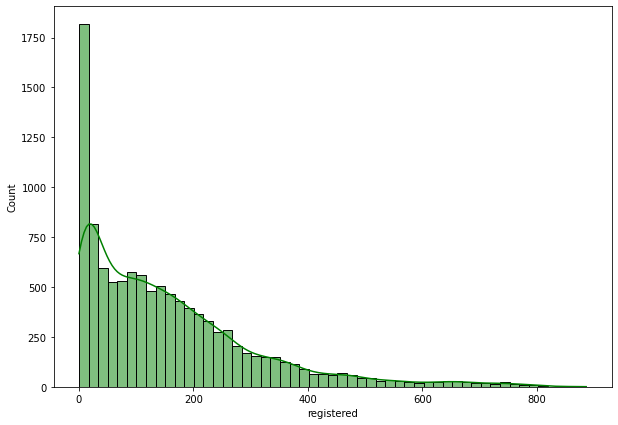

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(new_df['registered'], kde = True, color= 'green');

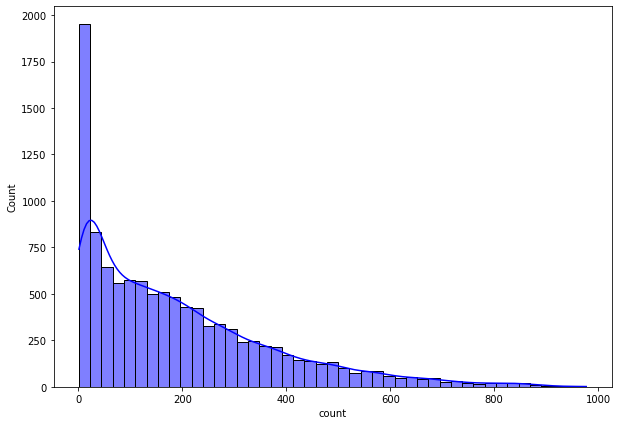

In [ ]:
plt.figure(figsize = (10,7))
sns.histplot(new_df['count'], kde = True, color= 'blue');

<Figure size 720x504 with 0 Axes>

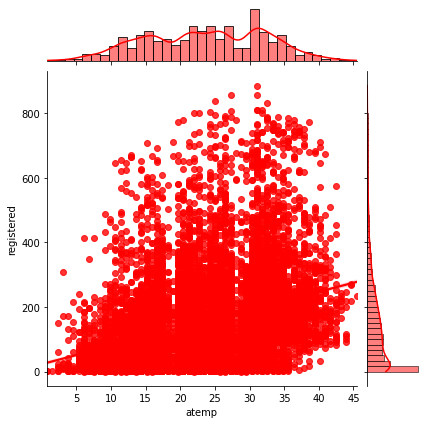

In [ ]:
plt.figure(figsize = (10,7))
sns.jointplot(x = 'atemp', y='registered',kind = 'reg', data = df, color = 'red');

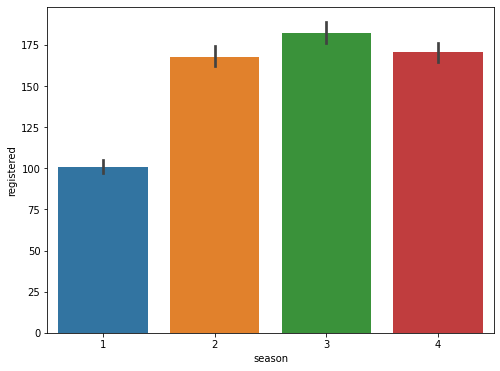

In [ ]:
plt.figure(figsize = (8,6))
# make a barplot with estomator =  
sns.barplot(x = 'season',y= 'registered', data = df);

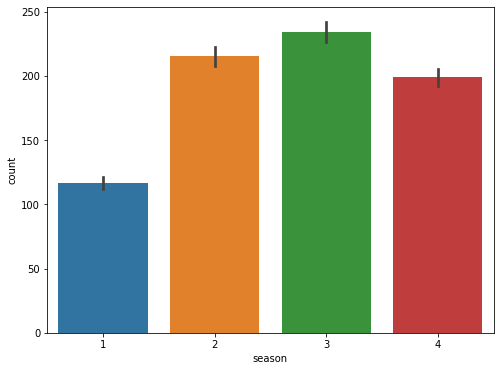

In [ ]:
plt.figure(figsize = (8,6))
# make a barplot with estomator =  
sns.barplot(x = 'season',y= 'count', data = df);

In [ ]:
atemps= set(new_df['atemp'])